In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

In [2]:
import dask

dask.__version__

'2021.06.2'

In [3]:
import pandas as pd

df = pd.read_csv("low_assets/valid_purchase_sota.csv")
df.head()

session_id  target  item_id  weight  prediction
0     4636233       0        0       0   -2.424682
1     8961633       0        0       0   -4.398143
2      835233       0        0       0   -3.775572
3     1097433       0        0       0   -4.488155
4     2539233       0        0       0   -4.899196

In [5]:
df.target.value_counts()

0    874356
1     50797
Name: target, dtype: int64

In [4]:
import numpy as np
df['probability'] = 1.0 / (1.0 + np.exp(-df['prediction']))
df.head()

session_id  target  item_id  weight  prediction  probability
0     4636233       0        0       0   -2.424682     0.081310
1     8961633       0        0       0   -4.398143     0.012151
2      835233       0        0       0   -3.775572     0.022410
3     1097433       0        0       0   -4.488155     0.011116
4     2539233       0        0       0   -4.899196     0.007397

In [5]:
thres = -2.967180

In [6]:
y_pred = df['prediction'] > thres
y_target = df['target']

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    874356
           1       0.16      0.77      0.27     50797

    accuracy                           0.77    925153
   macro avg       0.57      0.77      0.57    925153
weighted avg       0.94      0.77      0.83    925153



In [8]:
y_pred = df['probability'] > 0.5
y_target = df['target']

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    874356
           1       0.57      0.04      0.07     50797

    accuracy                           0.95    925153
   macro avg       0.76      0.52      0.52    925153
weighted avg       0.93      0.95      0.92    925153



In [14]:
y_pred = df.probability

Logistic PR AUC: 0.288


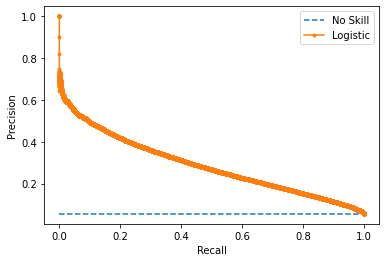

In [15]:
# plot no skill and model precision-recall curves
from sklearn.metrics import *

import matplotlib.pyplot as plt
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(test_y[test_y==1]) / len(test_y)
	# plot the no skill precision-recall curve
	plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(test_y, model_probs)
	plt.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	# show the legend
	plt.legend()
	# show the plot
	plt.show()
    
precision, recall, _ = precision_recall_curve(y_target, y_pred)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_target, y_pred)    

In [2]:
import dask.dataframe as dd
from lib.data import construct
import lib.data.preprocess as preprocess
import lib.data.features.timefeatures as feat

In [3]:
from imp import reload
    # Do some things.
# single = reload(single)
construct = reload(construct)
feat = reload(feat)

In [10]:

import lib.input.single_stg as single
from lib.models.single_stage import training
from imp import reload

In [4]:

dc, db, _ = construct.read_recsys_data(False)
db.inf()

/hd/anaconda3/envs/master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


AttributeError: 'DataFrame' object has no attribute 'inf'

In [8]:
len(db.groupby('session_id'))

509696

In [20]:
import numpy as np
from lib.utils.process_input import get_gen_outs
from lib.utils import process_input

encoders = process_input.get_one_hot_encoders()
X_fake = np.load("X_fake.npy",allow_pickle=True)

X_fake_ls = []

print(X_fake.shape)

i = 0
for k in X_fake:
    if i % 10 == 0:
        print(i)
    s = single.create_readable_df_stg(k.toarray(), get_gen_outs(), encoders)
    s['s_id_fake'] = i
    i+=1
    X_fake_ls.append(s)

(82219,)
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
22

KeyboardInterrupt: 

In [22]:
import pandas as pd 
df = pd.concat(X_fake_ls)

df.head()

item_id  category        day      hour     month       week   dwelltime  \
0      0.0       0.0   0.361270 -0.551308 -0.168905  -0.635569   -1.199694   
1      0.0       0.0  -0.492009 -0.643860  0.156024   0.284650   -1.255171   
2      0.0       0.0  -1.403856 -0.688690 -0.727942  -0.246239   -1.193681   
3      6.0     226.0  13.583997  2.041113  9.283997  40.188675   -0.567889   
4      6.0     226.0  14.083729  3.304129  9.493998  40.307697  876.475037   

   item_rank  item_id_prob  s_id_fake  
0  -0.750740     -0.021708          0  
1  -0.664661     -0.028404          0  
2  -0.837485     -0.018929          0  
3  38.772957      0.047040          0  
4  87.874199      0.103383          0

<AxesSubplot:>

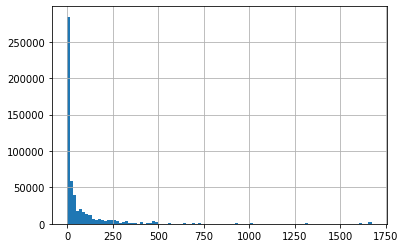

In [56]:
buyers.item_rank.hist(bins=100)

<AxesSubplot:>

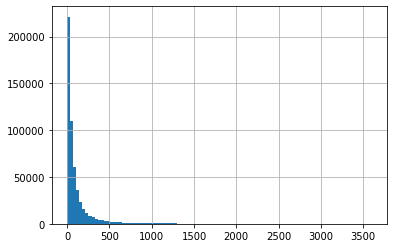

In [69]:
buyers.dwelltime.hist(bins=100)

In [68]:
ar = df.item_rank.astype(int)
ar[ar > 0].describe()

count    1.884920e+05
mean     6.764708e+05
std      4.433774e+07
min      1.000000e+00
25%      5.000000e+00
50%      1.600000e+01
75%      6.300000e+01
max      7.680017e+09
Name: item_rank, dtype: float64

<AxesSubplot:>

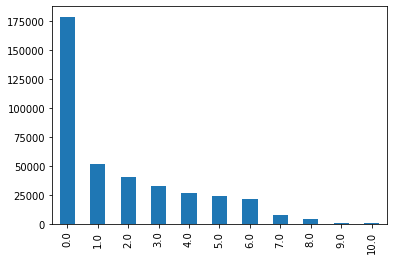

In [51]:
df.item_id.value_counts().plot.bar()

In [ ]:
scale.create_readable_df_stg(x, get_gen_outs(), encoders), y_class[idx], len_inp[idx])

In [46]:
df.item_rank.describe()

count    3.869060e+05
mean     3.295615e+05
std      3.094872e+07
min     -1.397487e+00
25%     -6.896869e-01
50%      5.803104e-01
75%      1.589525e+01
max      7.680017e+09
Name: item_rank, dtype: float64

<AxesSubplot:>

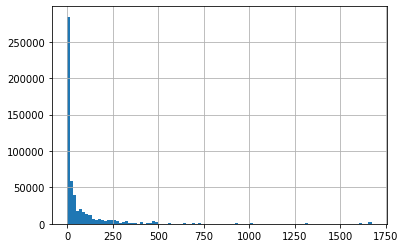

In [45]:
buyers.item_rank.hist(bins=100)

<AxesSubplot:>

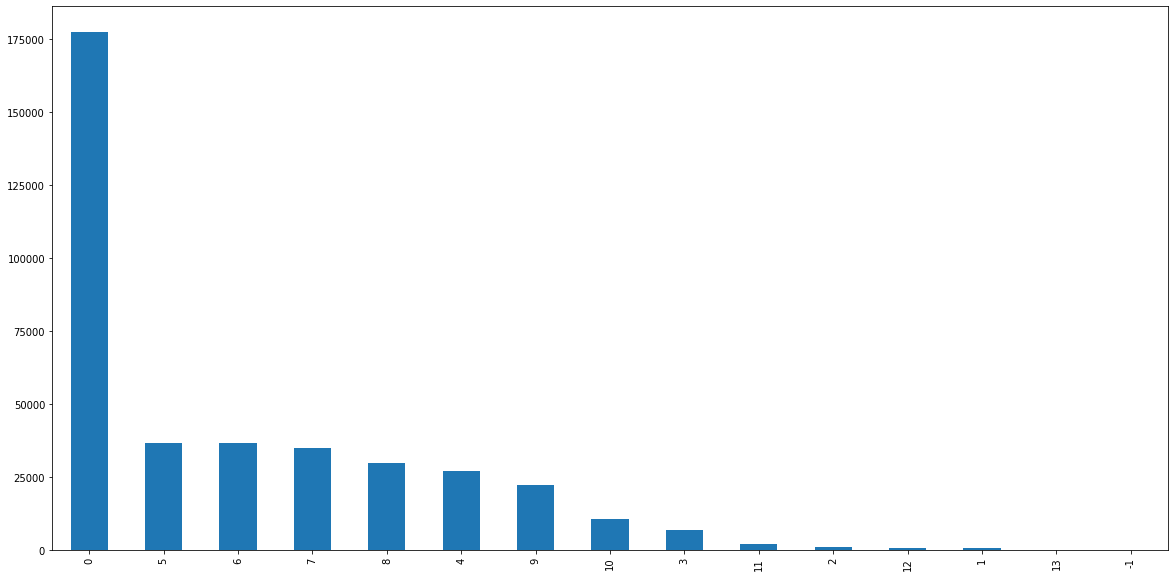

In [49]:
df.month.astype(int).value_counts().plot.bar(figsize=(20,10))

<AxesSubplot:>

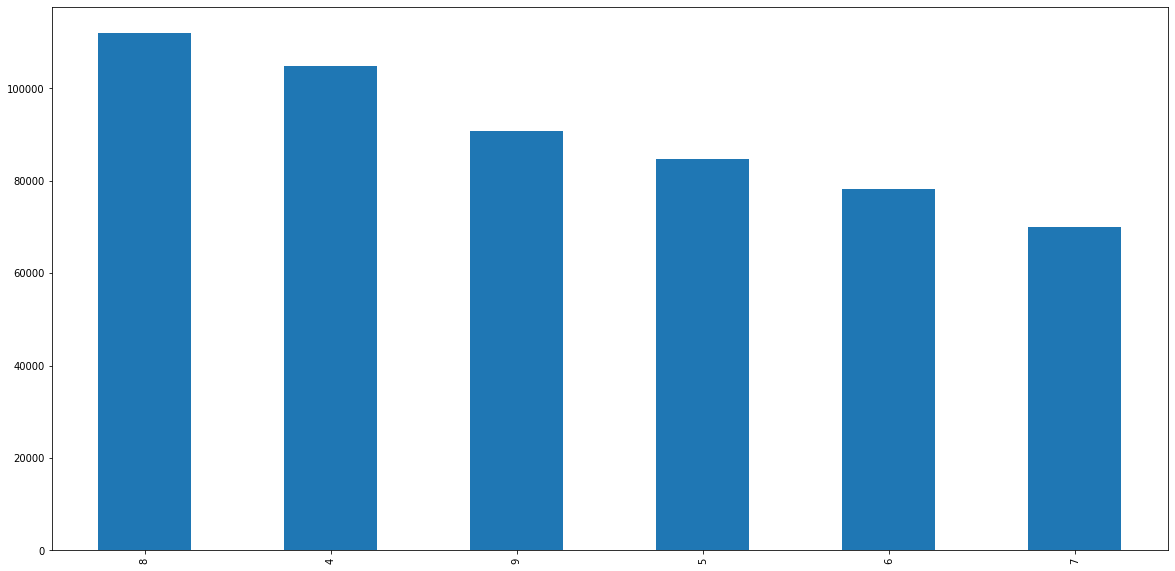

In [47]:
buyers.month.value_counts().plot.bar(figsize=(20,10))

In [37]:
buyers = train_df[train_df.label == True]
buyers

session_id                         timestamp    item_id  category  \
0              103  2014-04-03 14:23:44.577000+00:00  214748293       227   
1              103  2014-04-03 14:24:12.525000+00:00  214748293       227   
2              182  2014-04-04 14:52:04.266000+00:00  214535621       227   
3              182  2014-04-04 14:53:11.019000+00:00  214535621       227   
4              197  2014-04-05 17:55:44.263000+00:00  214774685       227   
...            ...                               ...        ...       ...   
540360    11298818  2014-09-26 15:38:57.279000+00:00  214716643         1   
540361    11299519  2014-09-24 09:41:54.567000+00:00  214837873       226   
540362    11299519  2014-09-24 09:57:38.326000+00:00  214510445       226   
540363    11299519  2014-09-24 09:59:18.291000+00:00  214864547         3   
540364    11299519  2014-09-24 10:01:26.837000+00:00  214696434       226   

        dwelltime  weekday  day  hour  month  week  item_id_prob  item_rank  \
0               0        3    3     2      4    14          0.32       46.0   
1              27        3    3     2      4    14          0.32       46.0   
2               0        4    4     2      4    14          0.08      113.0   
3              66        4    4     2      4    14          0.08      113.0   
4               0        5    5     2      4    14          0.00       68.0   
...           ...      ...  ...   ...    ...   ...           ...        ...   
540360          1        4   26     2      9    39          0.16        9.0   
540361          0        2   24     1      9    39          0.24       15.0   
540362        943        2   24     1      9    39          0.00      230.0   
540363         99        2   24     1      9    39          0.50        0.0   
540364        128        2   24     1      9    39          0.04       51.0   

        price_dist_avg  label  
0            1675.0000   True  
1            1675.0000   True  
2               0.0000   True  
3               0.0000   True  
4             976.6667   True  
...                ...    ...  
540360       1832.0000   True  
540361          0.0000   True  
540362       2618.0000   True  
540363          0.0000   True  
540364          0.0000   True  

[540365 rows x 14 columns]

<AxesSubplot:>

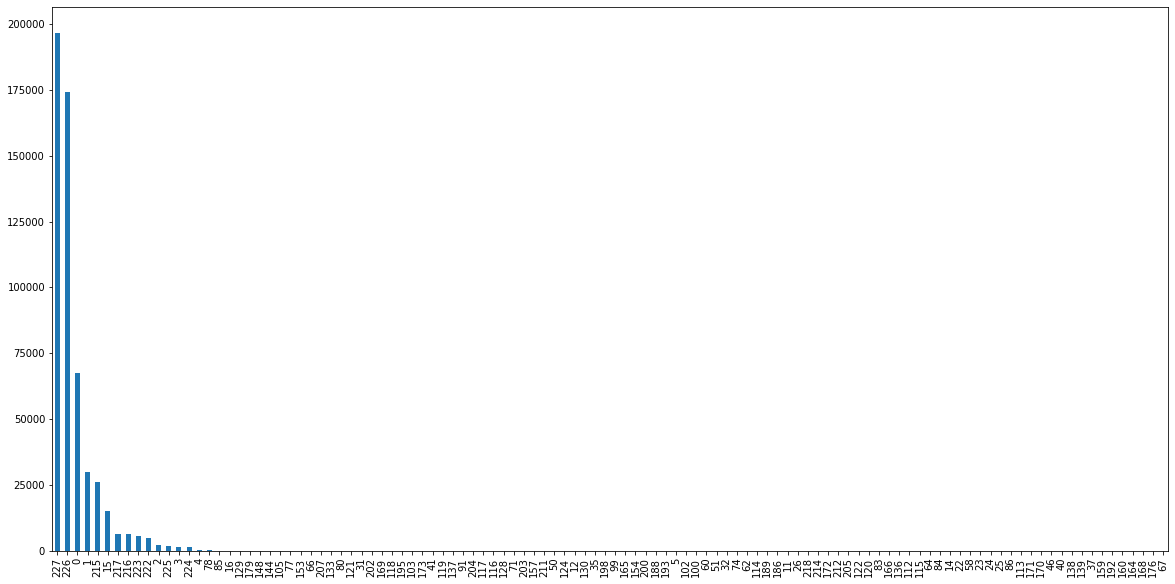

In [38]:
buyers.category.value_counts().plot.bar(figsize=(20,10))

In [ ]:
import pandas as pd

(pd.get_dummies(train_df[['item_id']])
   .multiply(train_df.item_id, axis=0)
   .groupby(train_df.session_id).sum()
)


In [36]:
train_df, valid_df, test_df = construct.load_constructed('01')

In [60]:
%%time
def create_label_encoder(x):

    d = {b: a +1 for a, b in enumerate(set(x.copy()))}
    k = []
    
    x = x.map(d)
    
    return x

train_df['item_id'] = train_df.groupby('session_id').item_id.apply(create_label_encoder)
train_df

KeyboardInterrupt: 

In [9]:
valid_df.describe()

session_id       item_id       category      dwelltime  \
count  5.647910e+05  5.647910e+05  564791.000000  564791.000000   
mean   5.651395e+06  2.168878e+08     168.516210      -0.011667   
std    3.352760e+06  3.023527e+07      97.262548       0.981776   
min    1.200000e+01  2.145073e+08       0.000000      -0.381201   
25%    2.728688e+06  2.146764e+08      15.000000      -0.381201   
50%    5.573628e+06  2.148268e+08     226.000000      -0.271058   
75%    8.550315e+06  2.148456e+08     227.000000      -0.064539   
max    1.156212e+07  1.178830e+09     227.000000      12.006504   

             weekday            day           hour          month  \
count  564791.000000  564791.000000  564791.000000  564791.000000   
mean       -0.009829       0.001761      -0.005077       0.006526   
std         0.997698       0.999363       1.002521       0.999125   
min        -1.443006      -1.705542      -1.854662      -1.430984   
25%        -0.986417      -0.774378      -0.741668      -0.856777   
50%        -0.073238      -0.076006       0.371327       0.291638   
75%         0.839941       0.855158       0.371327       0.865845   
max         1.296530       1.786321       1.484322       1.440053   

                week   item_id_prob      item_rank  
count  564791.000000  564791.000000  564791.000000  
mean       26.687711      -0.038361      -0.013550  
std         7.697571       0.972236       0.978279  
min        14.000000      -1.130048      -0.380516  
25%        20.000000      -0.707611      -0.373895  
50%        27.000000      -0.285174      -0.327543  
75%        34.000000       0.559700      -0.082539  
max        40.000000       9.430873      10.697615

In [10]:
test_df.describe()

session_id       item_id       category      dwelltime  \
count  6.305810e+05  6.305810e+05  630581.000000  630581.000000   
mean   5.625258e+06  2.168437e+08     182.613915      -0.012785   
std    3.346231e+06  2.986213e+07      87.853908       0.979757   
min    8.200000e+01  2.145073e+08       0.000000      -0.381201   
25%    2.708721e+06  2.146764e+08     222.000000      -0.381201   
50%    5.513674e+06  2.148268e+08     226.000000      -0.271058   
75%    8.529877e+06  2.148455e+08     227.000000      -0.064539   
max    1.156213e+07  6.430788e+08     227.000000      12.003062   

             weekday            day           hour          month  \
count  630581.000000  630581.000000  630581.000000  630581.000000   
mean       -0.015270      -0.000193      -0.004362      -0.001026   
std         0.997923       1.003495       1.005252       0.997405   
min        -1.443006      -1.705542      -1.854662      -1.430984   
25%        -0.986417      -0.890774      -0.741668      -0.856777   
50%        -0.073238      -0.076006       0.371327      -0.282569   
75%         0.839941       0.855158       0.371327       0.865845   
max         1.296530       1.786321       1.484322       1.440053   

                week   item_id_prob      item_rank  
count  630581.000000  630581.000000  630581.000000  
mean       26.629649      -0.036446      -0.012990  
std         7.683927       0.973977       0.982482  
min        14.000000      -1.130048      -0.380516  
25%        20.000000      -0.707611      -0.373895  
50%        27.000000      -0.285174      -0.327543  
75%        34.000000       0.559700      -0.082539  
max        40.000000       9.430873      10.697615

In [23]:
train_df.describe()

session_id       item_id      category     dwelltime       weekday  \
count  2.668162e+06  2.668162e+06  2.668162e+06  2.668162e+06  2.668162e+06   
mean   5.628641e+06  2.171140e+08  1.820410e+02  1.095781e+02  3.169918e+00   
std    3.365145e+06  3.172921e+07  8.827696e+01  2.873623e+02  2.189669e+00   
min    1.000000e+00  2.145073e+08  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.680303e+06  2.146775e+08  2.170000e+02  0.000000e+00  1.000000e+00   
50%    5.544324e+06  2.148269e+08  2.260000e+02  3.400000e+01  3.000000e+00   
75%    8.537128e+06  2.148456e+08  2.270000e+02  9.500000e+01  5.000000e+00   
max    1.156216e+07  1.178838e+09  2.270000e+02  3.599000e+03  6.000000e+00   

                day          hour         month          week  item_id_prob  \
count  2.668162e+06  2.668162e+06  2.668162e+06  2.668162e+06  2.668162e+06   
mean   1.564948e+01  1.669119e+00  6.492480e+00  2.663286e+01  1.082652e-01   
std    8.583896e+00  8.995442e-01  1.745407e+00  7.722856e+00  9.570391e-02   
min    1.000000e+00  0.000000e+00  4.000000e+00  1.400000e+01  0.000000e+00   
25%    9.000000e+00  1.000000e+00  5.000000e+00  2.000000e+01  4.000000e-02   
50%    1.500000e+01  2.000000e+00  6.000000e+00  2.700000e+01  8.000000e-02   
75%    2.300000e+01  2.000000e+00  8.000000e+00  3.400000e+01  1.600000e-01   
max    3.100000e+01  3.000000e+00  9.000000e+00  4.000000e+01  1.000000e+00   

          item_rank  price_dist_avg  
count  2.668162e+06    2.668162e+06  
mean   5.723877e+01   -2.678074e+02  
std    1.504891e+02    2.888045e+03  
min    0.000000e+00   -1.041440e+05  
25%    1.000000e+00    0.000000e+00  
50%    9.000000e+00    0.000000e+00  
75%    4.700000e+01    0.000000e+00  
max    1.673000e+03    1.041440e+05

(2668162, 14)


<AxesSubplot:>

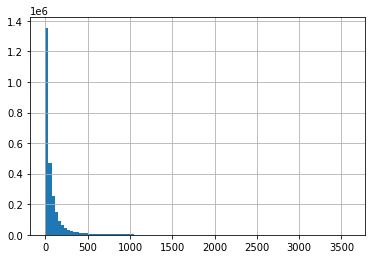

In [16]:
print(train_df.shape)
train_df.dwelltime.hist(bins=100)

<AxesSubplot:>

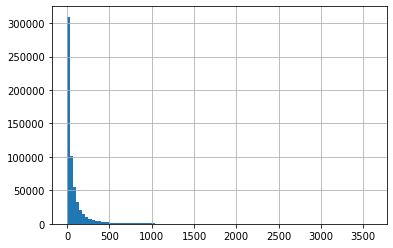

In [17]:
valid_df.dwelltime.hist(bins=100)

<AxesSubplot:>

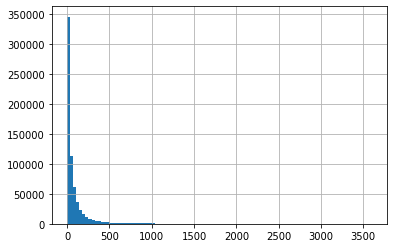

In [18]:
test_df.dwelltime.hist(bins=100)

<AxesSubplot:>

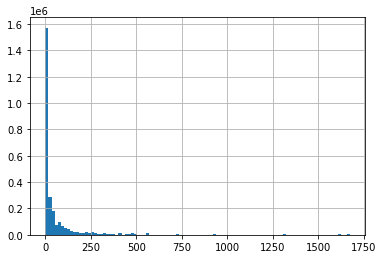

In [19]:

train_df.item_rank.hist(bins=100)

<AxesSubplot:>

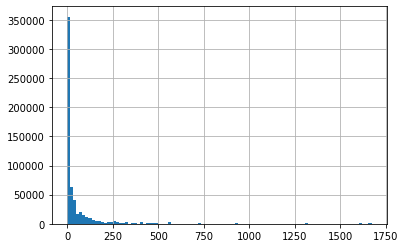

In [20]:

valid_df.item_rank.hist(bins=100)

In [21]:
df = feat.apply_timefeatures(df)

NameError: name 'df' is not defined

In [212]:
  
ddf = dd.from_pandas(df, npartitions=20)
df['dwelltime'] = ddf.groupby('session_id').timestamp\
              .apply(lambda x: x.diff()).dt.seconds.compute().fillna(0.0).astype(np.int32)

<ipython-input-212-0734f2f93d34>:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  df['dwelltime'] = ddf.groupby('session_id').timestamp\


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 12186
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   session_id  10000 non-null  object             
 1   timestamp   10000 non-null  datetime64[ns, UTC]
 2   item_id     10000 non-null  int16              
 3   category    10000 non-null  object             
 4   dwelltime   10000 non-null  int32              
dtypes: datetime64[ns, UTC](1), int16(1), int32(1), object(2)
memory usage: 371.1+ KB


In [ ]:
df

In [159]:
df = dd.from_pandas(df, npartitions=20).reset_index()
df

Dask DataFrame Structure:
                index session_id timestamp item_id category
npartitions=20                                             
                int64     object    object   int16   object
                  ...        ...       ...     ...      ...
...               ...        ...       ...     ...      ...
                  ...        ...       ...     ...      ...
                  ...        ...       ...     ...      ...
Dask Name: reset_index, 40 tasks

In [109]:
# df = df.set_index('session_id')
# df

In [110]:
r = df.groupby('session_id').size()
r = r[r> 1]



# df = df.set_index('session_id')

In [111]:
r.index.compute()

Index(['106', '107', '119', '122', '133', '137', '139', '142', '157', '158',
       ...
       '13274', '13276', '13282', '13284', '13291', '13292', '13293', '13294',
       '13304', '13308'],
      dtype='object', name='session_id', length=2312)

In [112]:
df.known_divisions

False

In [160]:
df['timestamp'] = dd.to_datetime(df.timestamp)
df

Dask DataFrame Structure:
                index session_id       timestamp item_id category
npartitions=20                                                   
                int64     object  datetime64[ns]   int16   object
                  ...        ...             ...     ...      ...
...               ...        ...             ...     ...      ...
                  ...        ...             ...     ...      ...
                  ...        ...             ...     ...      ...
Dask Name: assign, 100 tasks

In [133]:
# df = df.set_index('session_id')
df['gsize'] = df.reset_index().groupby('session_id').size()

df = df.compute()

ValueError: Not all divisions are known, can't align partitions. Please use `set_index` to set the index.

In [186]:
import pandas as pd
import numpy as np


dw = df\
     .groupby('session_id').timestamp\
     .apply(lambda x: x.diff().dt.seconds, meta=pd.Series(name="dwelltime", dtype=np.int32)).reset_index(drop=True).compute()


In [190]:
dw.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            426, 427, 428, 429, 430, 431, 432, 433, 434, 435],
           dtype='int64', length=10000)

In [194]:
dw

0         NaN
1       441.0
2        77.0
3         7.0
4        22.0
        ...  
431      44.0
432      39.0
433     476.0
434      34.0
435    1053.0
Name: dwelltime, Length: 10000, dtype: float64

In [193]:
df.join(dw,on=['session_id'],how='inner')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [167]:
df['dwelltime'] = dw
df.compute()

index session_id                        timestamp  item_id category  \
0        0          2 2014-04-07 13:56:37.614000+00:00    32342        0   
1        1          2 2014-04-07 13:57:19.373000+00:00    32342        0   
2        2          2 2014-04-07 13:58:37.446000+00:00    -1898        0   
3        3          2 2014-04-07 13:59:50.710000+00:00    -4082        0   
4        4          2 2014-04-07 14:00:38.247000+00:00    -4065        0   
..     ...        ...                              ...      ...      ...   
495  12182      12979 2014-04-04 06:22:25.779000+00:00    -8251        0   
496  12183      12979 2014-04-04 06:23:49.833000+00:00    -6558        0   
497  12184      12979 2014-04-04 07:15:13.633000+00:00    -6194        0   
498  12185      12979 2014-04-04 07:15:59.082000+00:00    22267        0   
499  12186      12979 2014-04-04 07:16:49.096000+00:00     7400        0   

     dwelltime  
0          NaN  
1        141.0  
2          NaN  
3         12.0  
4        242.0  
..         ...  
495        NaN  
496        NaN  
497        NaN  
498        NaN  
499        NaN  

[10000 rows x 6 columns]

In [ ]:
r.compute()

In [36]:
train_df['timestamp'].map_partitions(lambda x: dd.to_datetime(x))

Dask Series Structure:
npartitions=32
0          datetime64[ns]
81884                 ...
                ...      
2558689               ...
2641138               ...
dtype: datetime64[ns]
Dask Name: lambda, 897 tasks

In [32]:
train_df

Dask DataFrame Structure:
               session_id       timestamp item_id category label
npartitions=32                                                  
0                  object  datetime64[ns]   int16   object  bool
81884                 ...             ...     ...      ...   ...
...                   ...             ...     ...      ...   ...
2558689               ...             ...     ...      ...   ...
2641138               ...             ...     ...      ...   ...
Dask Name: assign, 705 tasks